# Génération de la suite d'une mélodie connue : "Ah vous dirais-je maman"

In [2]:
import os
import music21 as m21
import json
from datetime import datetime
from preprocessing import *
from training import *

humdrum.spineParser: WARNING: Error in parsing event ('*MFREI6/8') at position 9 for spine None: Incorrect meter: *MFREI6/8 found


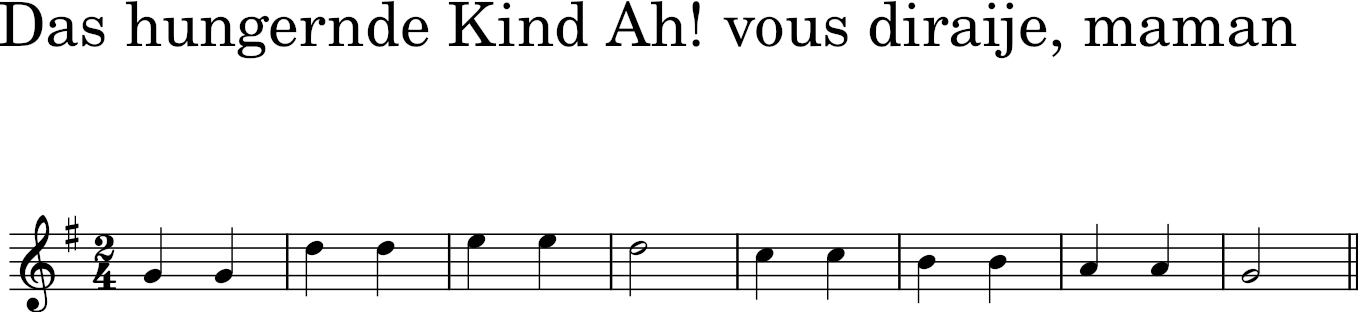

In [3]:
# Récupérer les notes de "Ah vous dirais-je maman"
french_dataset_path = "../data/france"
french_songs = load_songs(french_dataset_path, 100)
french_songs[11].show()
french_songs[11].show("midi")

old key :  G major


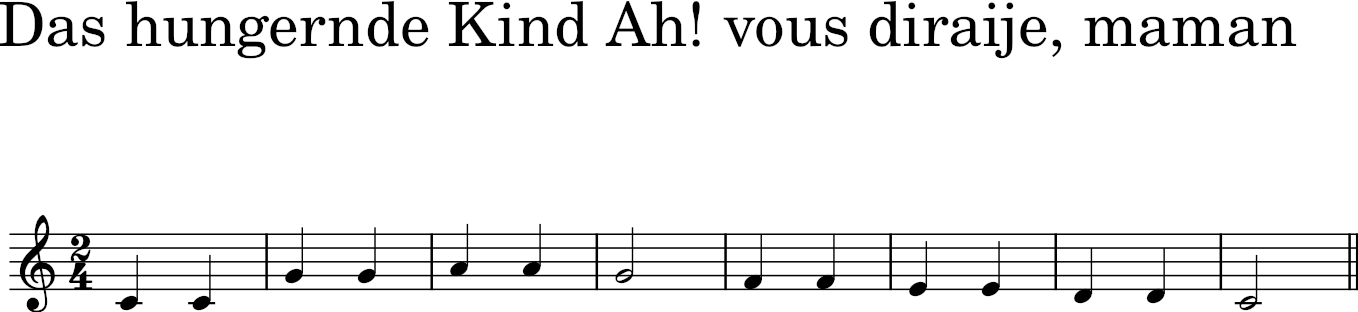

In [4]:
test_song = transpose(french_songs[11], True)
test_song.show()
test_song.show("midi")

In [5]:
test_song = encode_song(test_song)

In [6]:
print(test_song)
print(test_song[:64]) # 4 premières mesures

60 _ _ _ 60 _ _ _ 67 _ _ _ 67 _ _ _ 69 _ _ _ 69 _ _ _ 67 _ _ _ _ _ _ _ 65 _ _ _ 65 _ _ _ 64 _ _ _ 64 _ _ _ 62 _ _ _ 62 _ _ _ 60 _ _ _ _ _ _ _
60 _ _ _ 60 _ _ _ 67 _ _ _ 67 _ _ _ 69 _ _ _ 69 _ _ _ 67 _ _ _ _


### Modèle entraîné sur le dataset han (chinois)

In [15]:
model = keras.models.load_model("../data/han/model_RNN_LSTM.keras")

# start symboles
start_symbols = ["/"] * 64

# mappings
with open("../data/han/mapping.json", "r") as fp:
    mappings = json.load(fp)

In [16]:
# Générer 10 mélodies à partir de ah vous dirais-je maman
melodies = []
for _ in range (10):
    melodies.append(generate_melody(model, start_symbols, mappings, test_song[:64], 500, 64, 0.7))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━

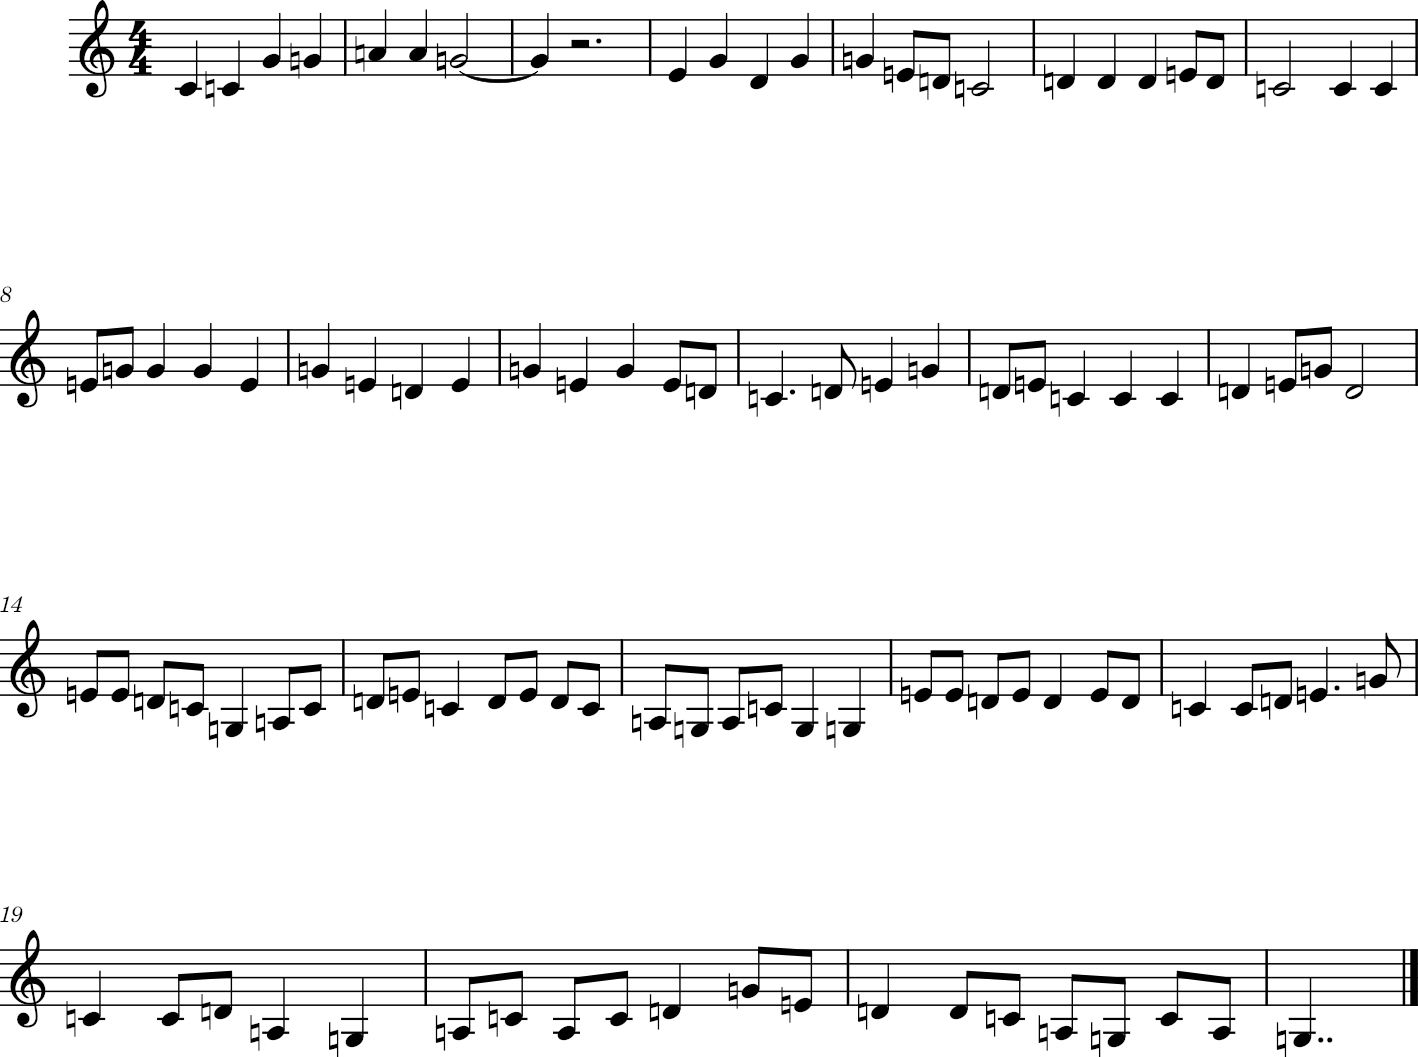

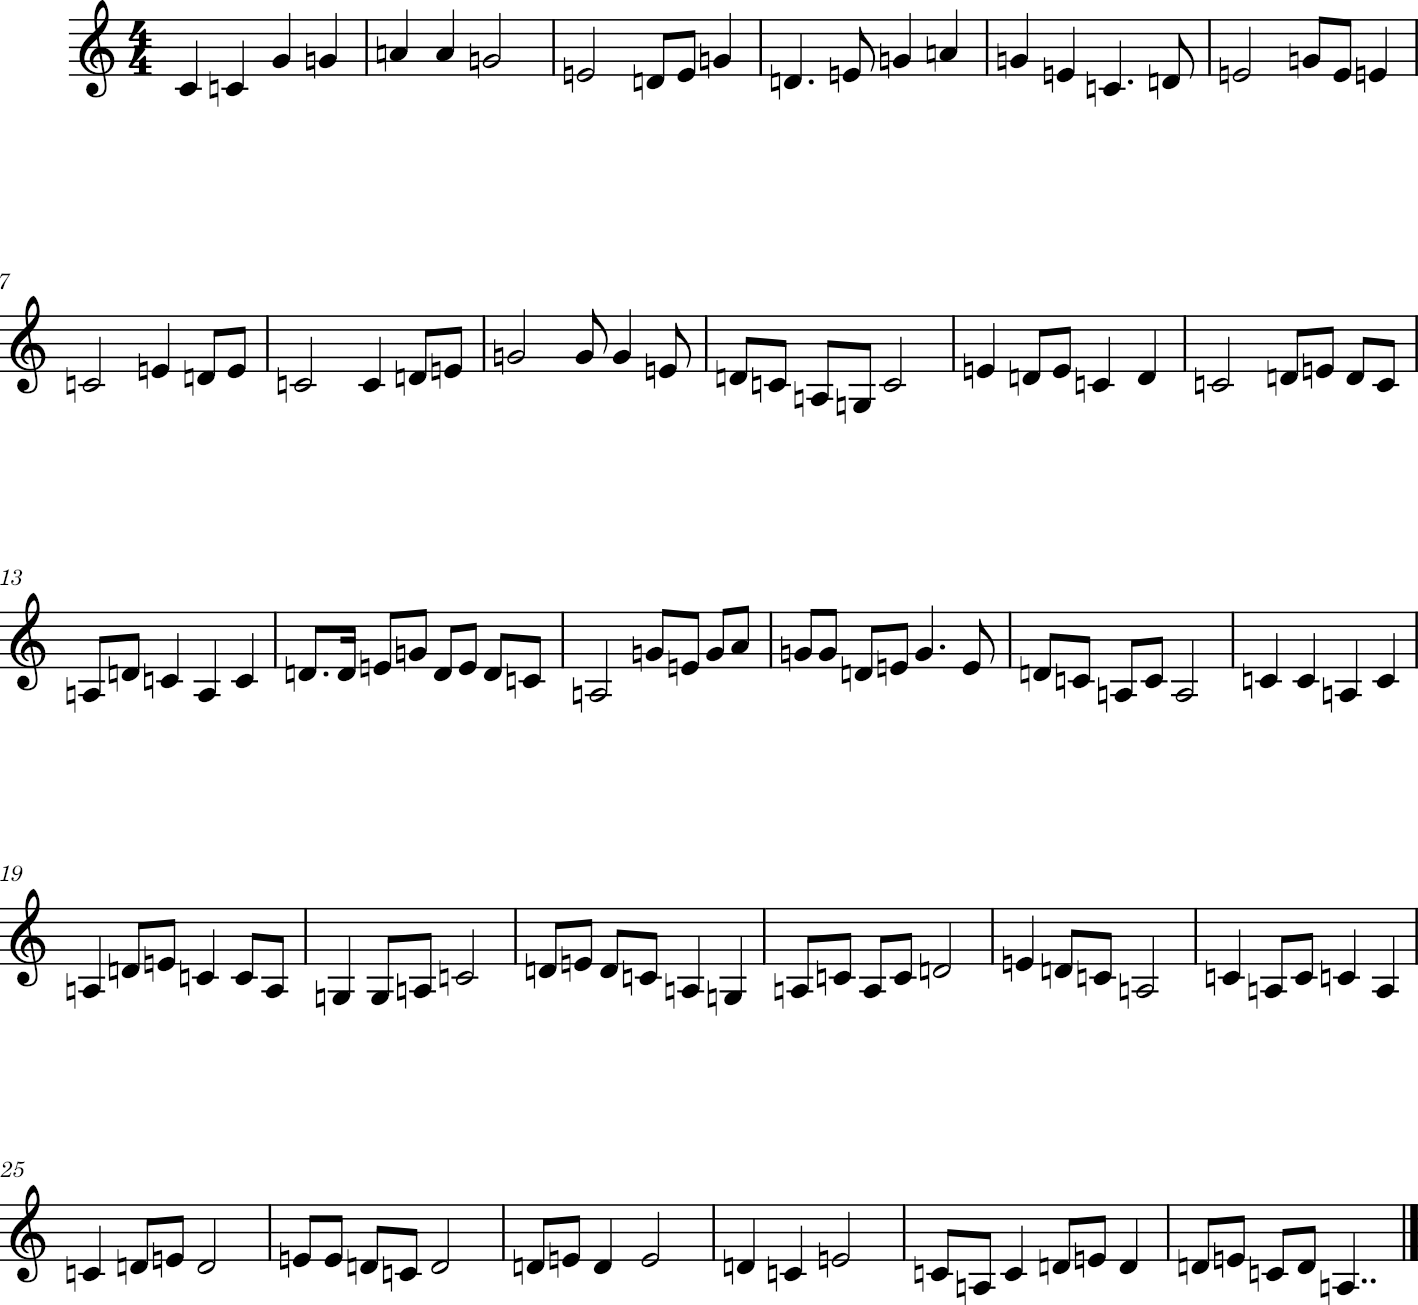

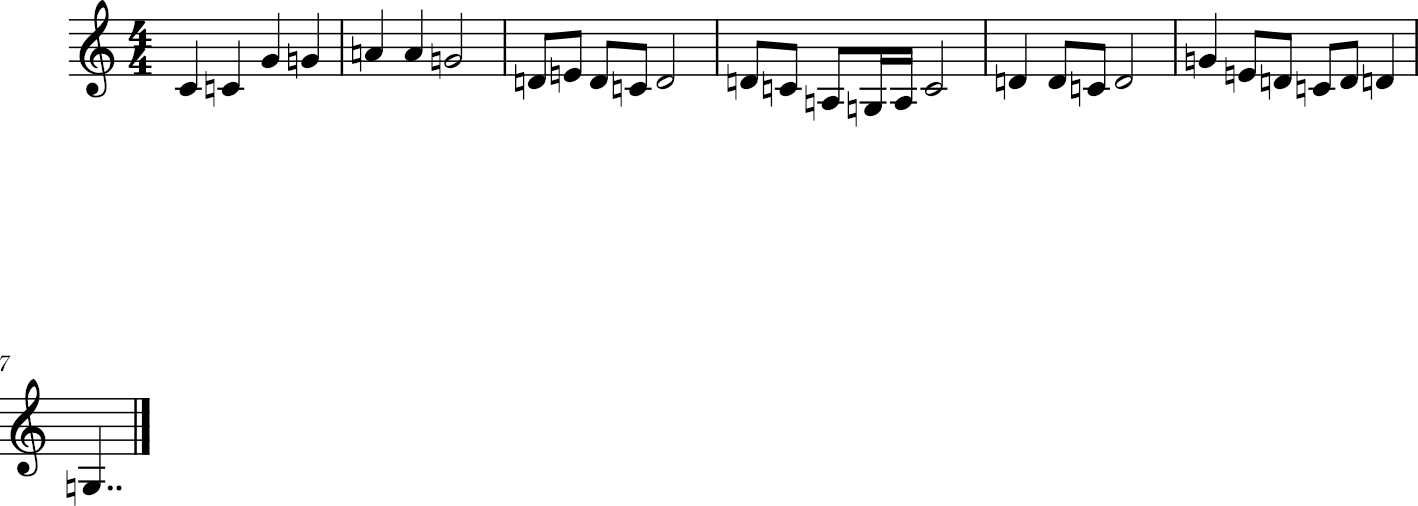

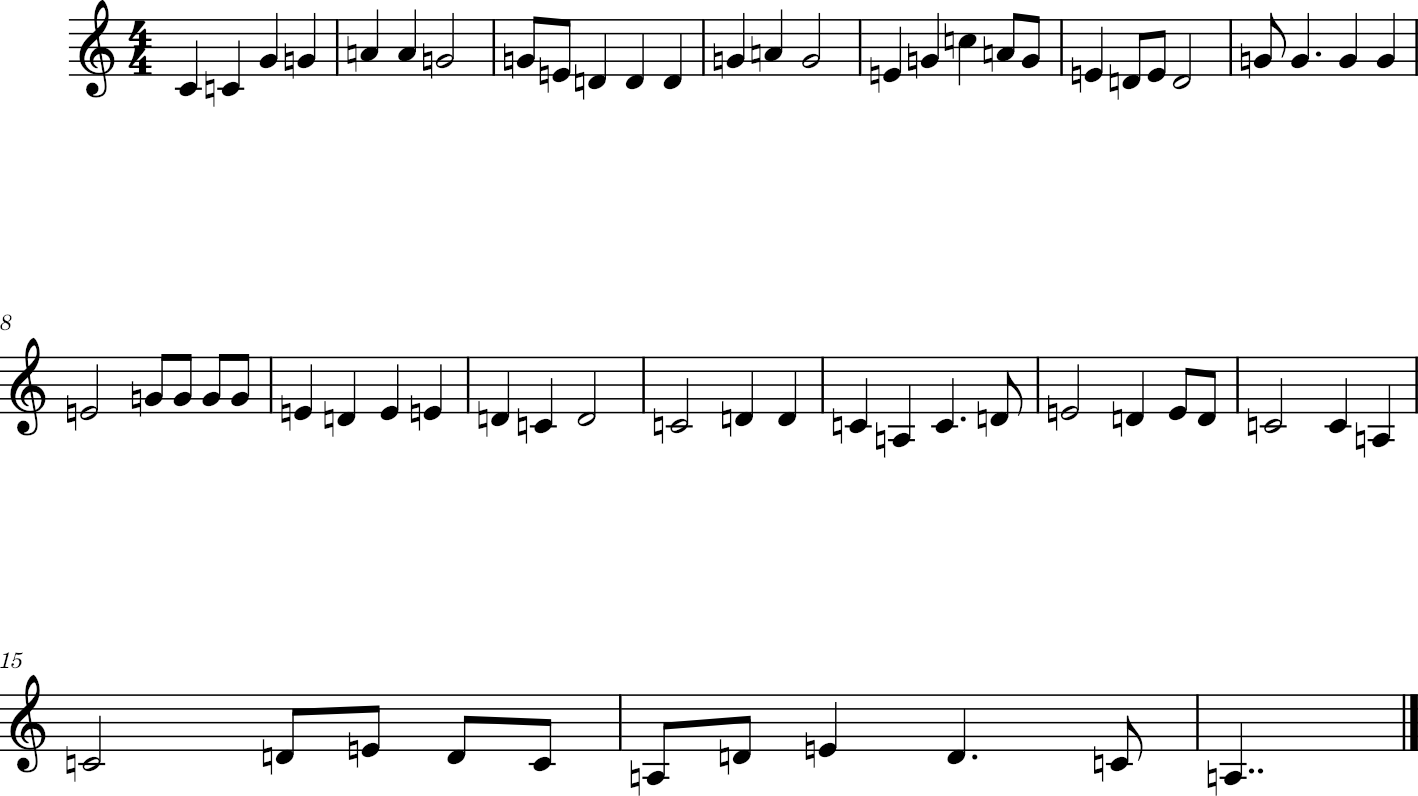

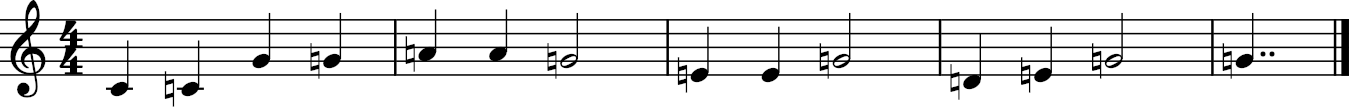

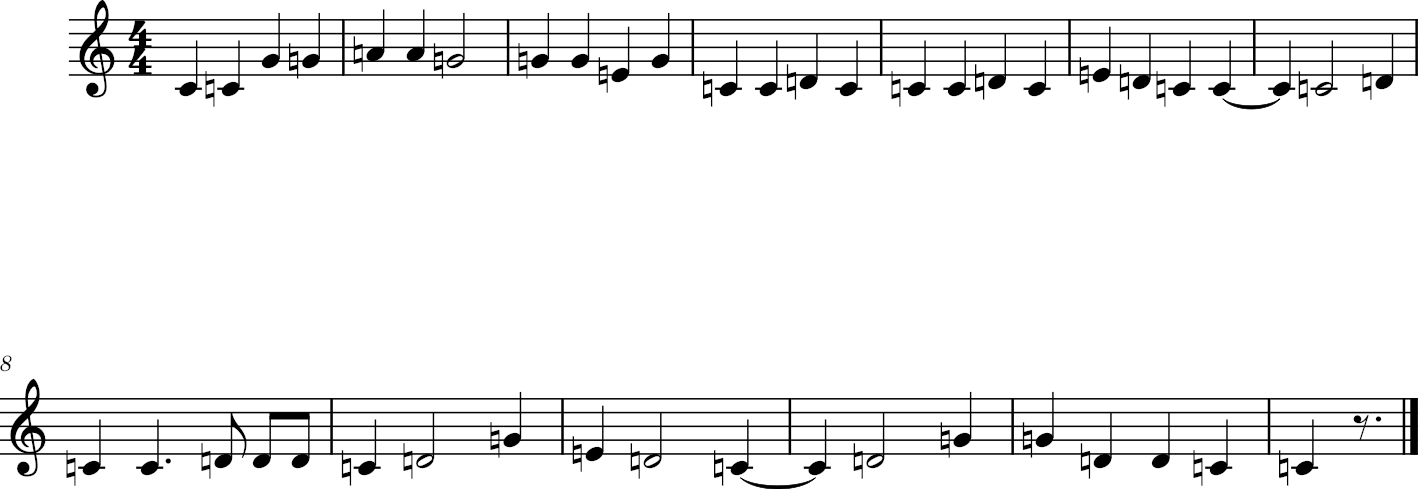

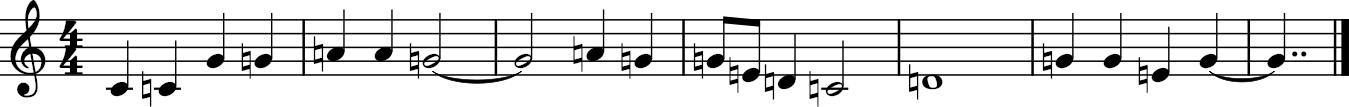

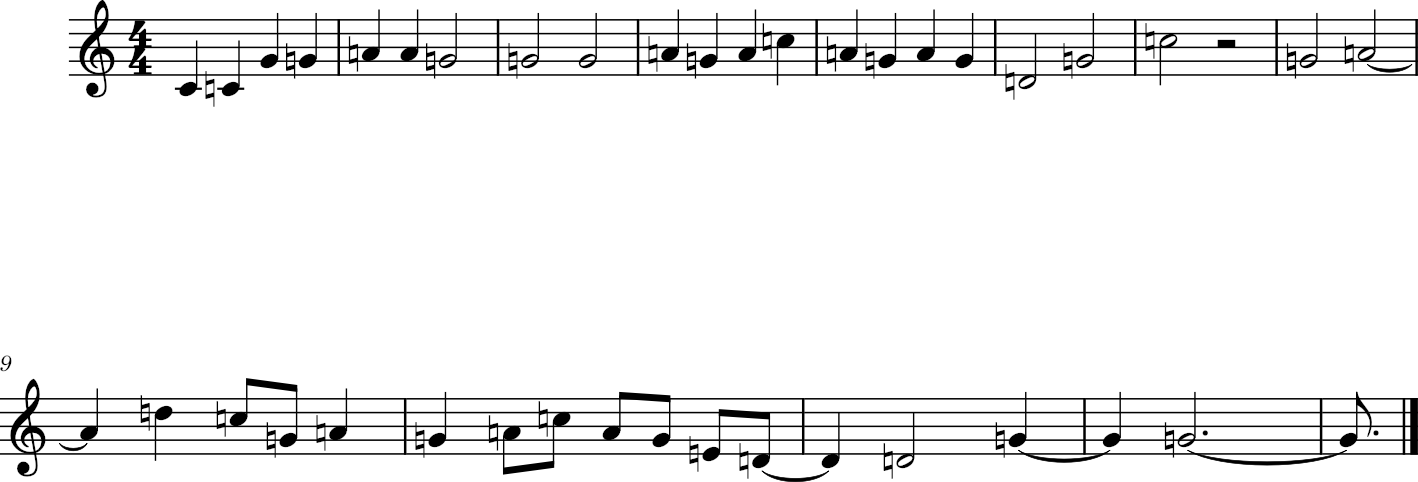

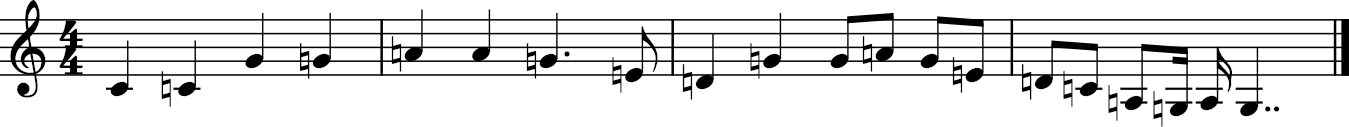

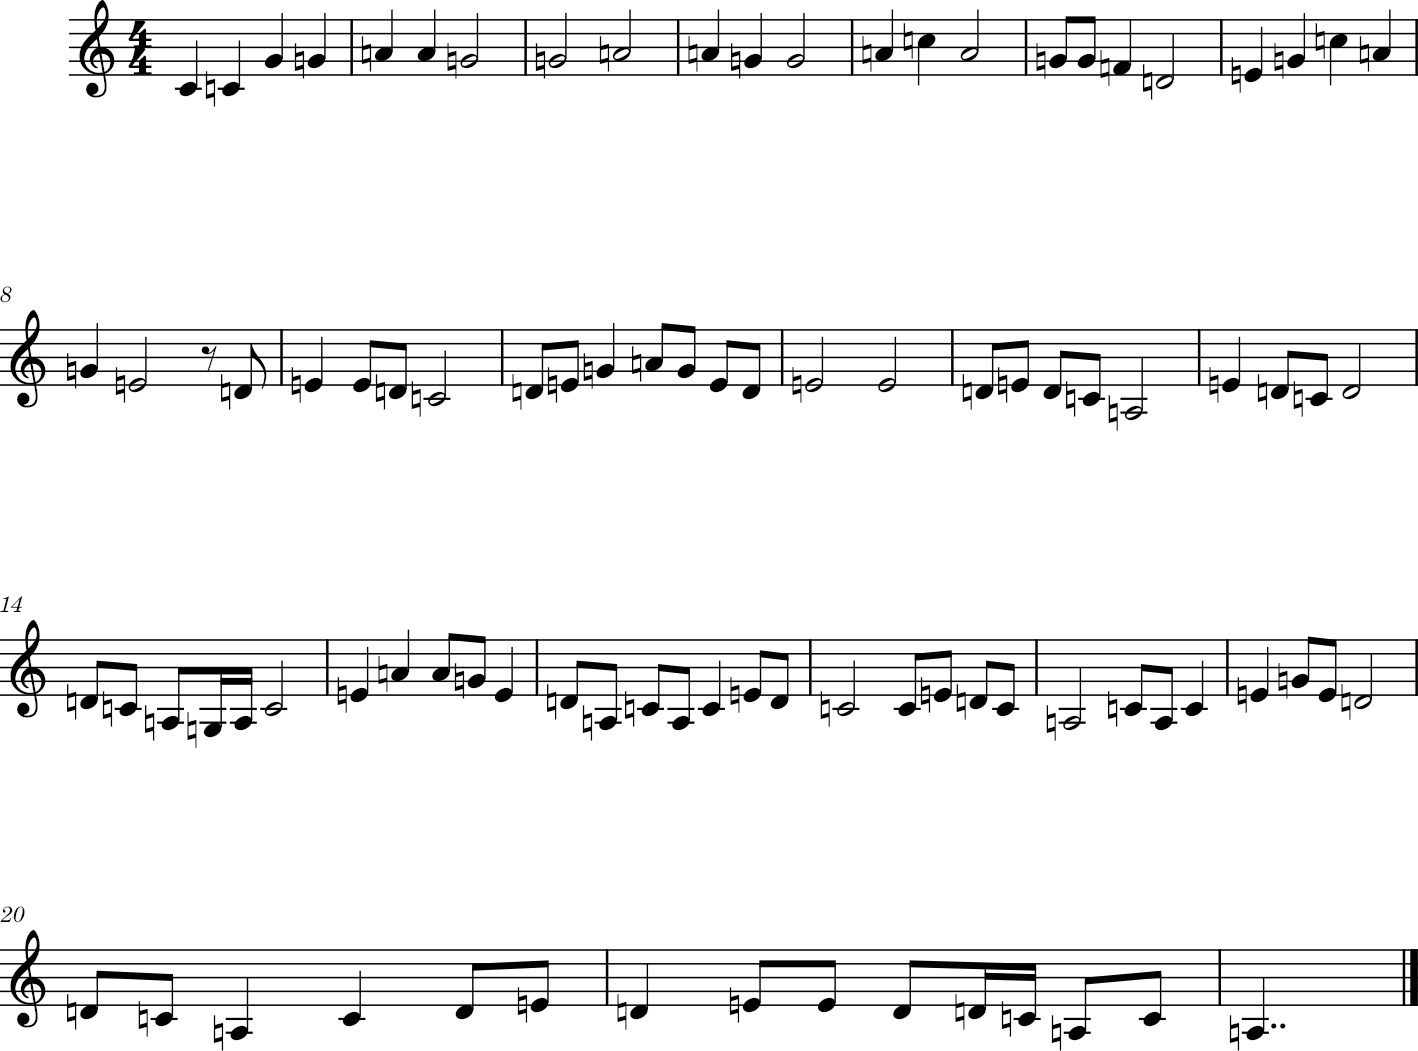

In [17]:
# Les mettre en format midi
songs = []
for i in range(10):
    songs.append(convert_to_midi(melodies[i]))

for song in songs:
    song.show("midi")
    song.show()

#songs[5].write("midi", "../generated_melodies/goodexamples/ahvousidraisjemaman_han.midi")

### Modèle entraîné sur le dataset deutsch (allemand)

In [8]:
model_deutsch = keras.models.load_model("../data/deutsch/model_RNN_LSTM-25epochs.keras")

# start symboles
start_symbols = ["/"] * 64

# mappings
with open("../data/deutsch/mapping.json", "r") as fp:
    mappings_deutsch = json.load(fp)

In [9]:
# Générer 10 mélodies à partir de ah vous dirais-je maman
melodies_deutsch = []
for _ in range (10):
    melodies_deutsch.append(generate_melody(model_deutsch, start_symbols, mappings_deutsch, test_song[:64], 500, 64, 0.7))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━

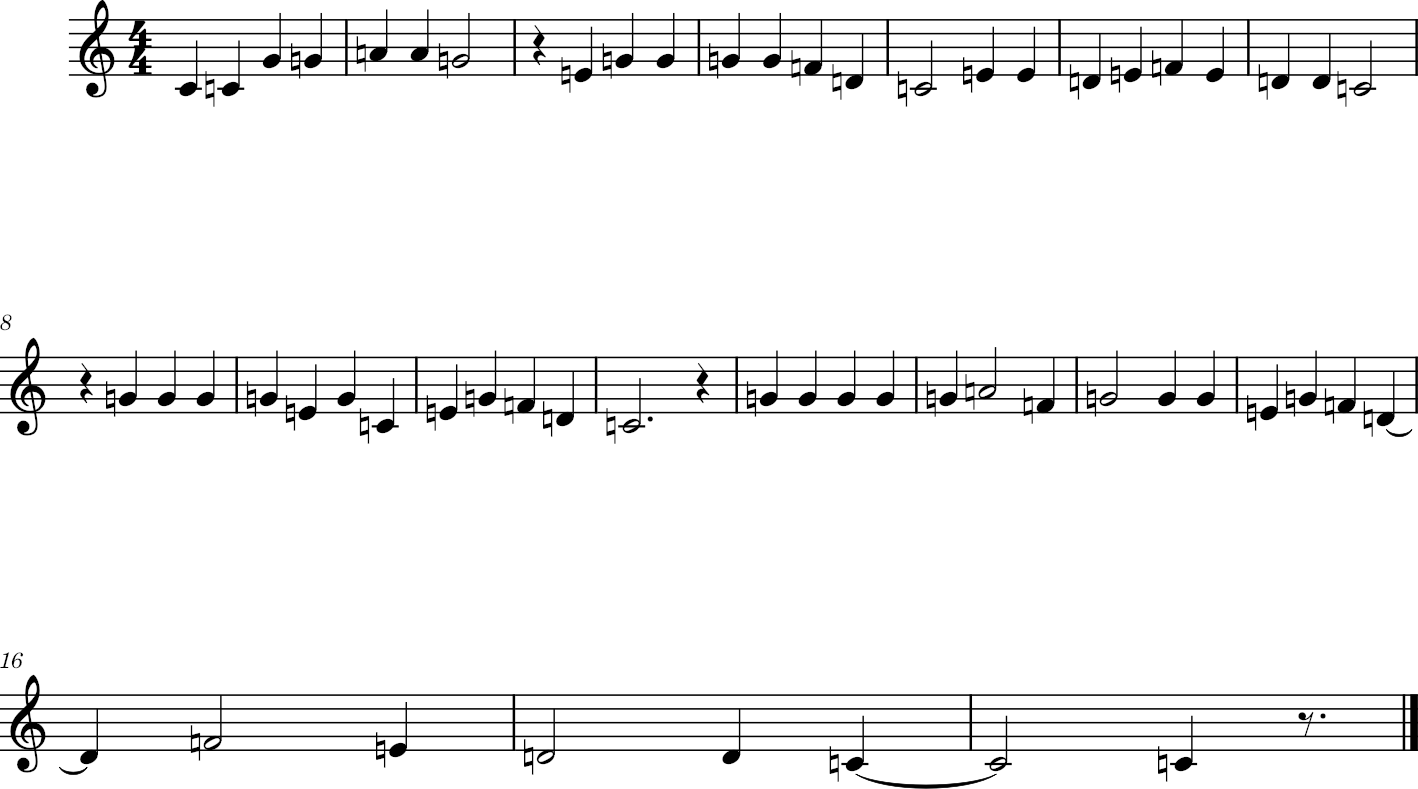

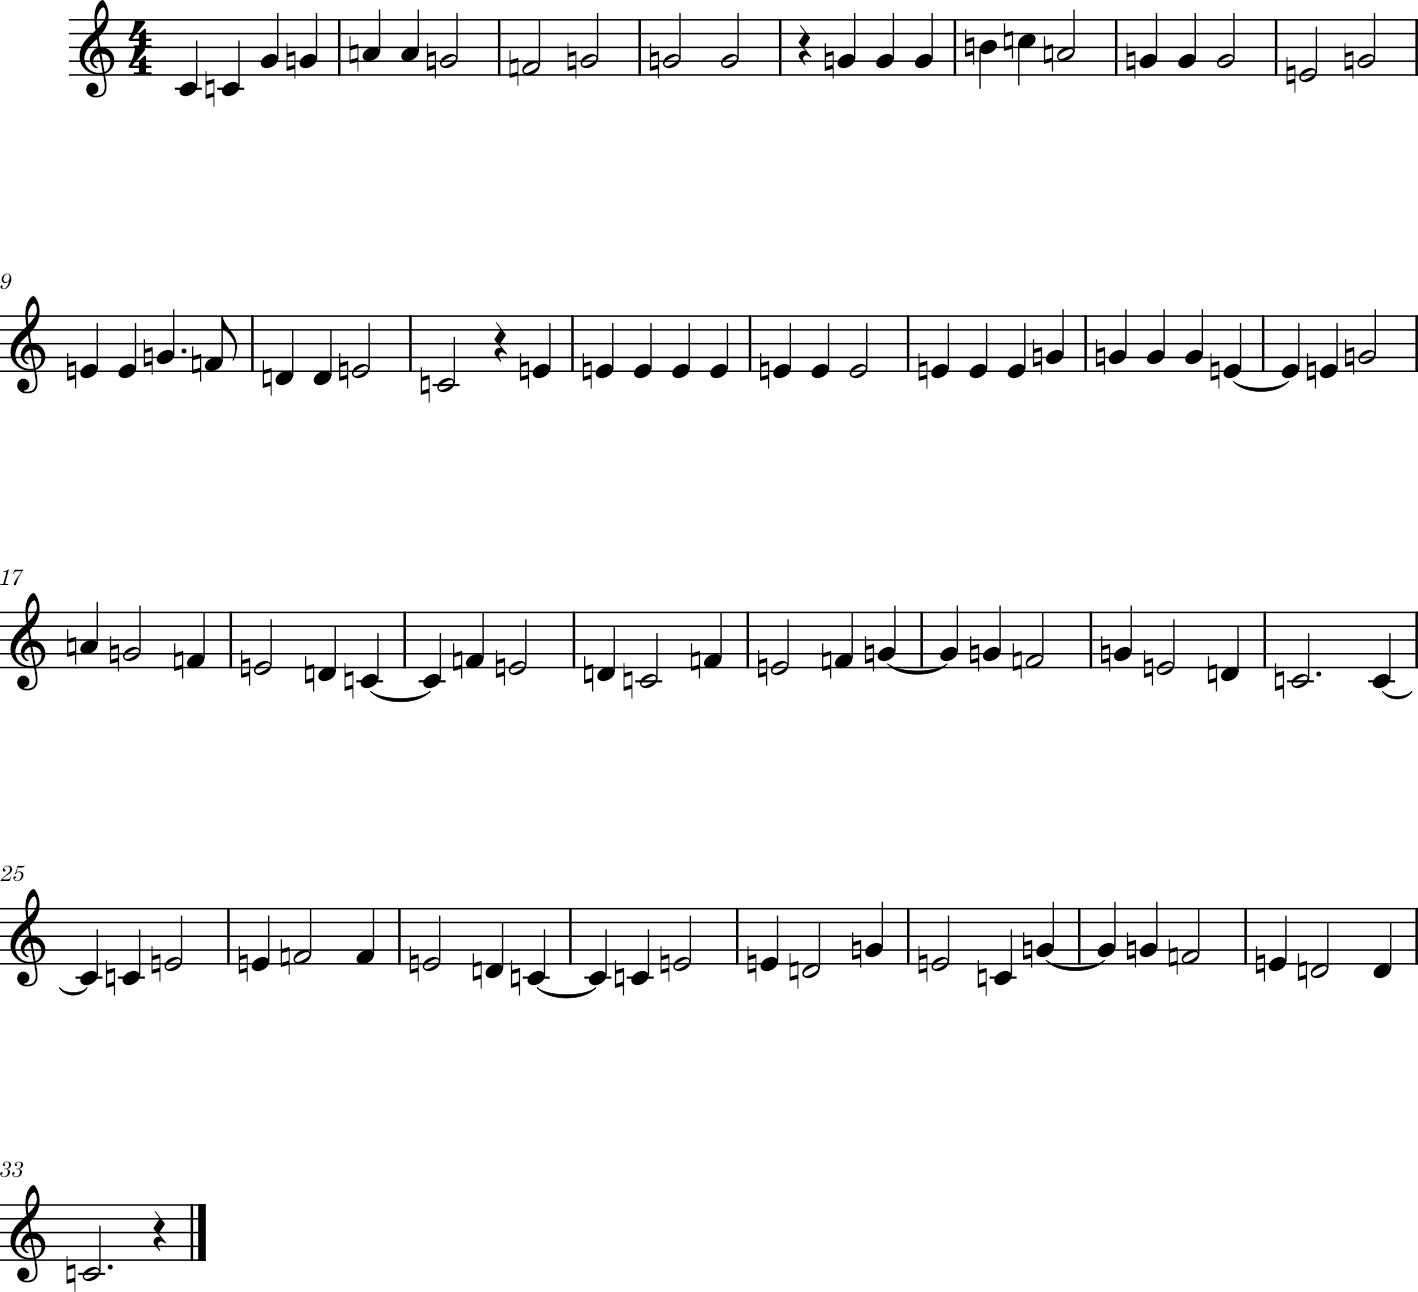

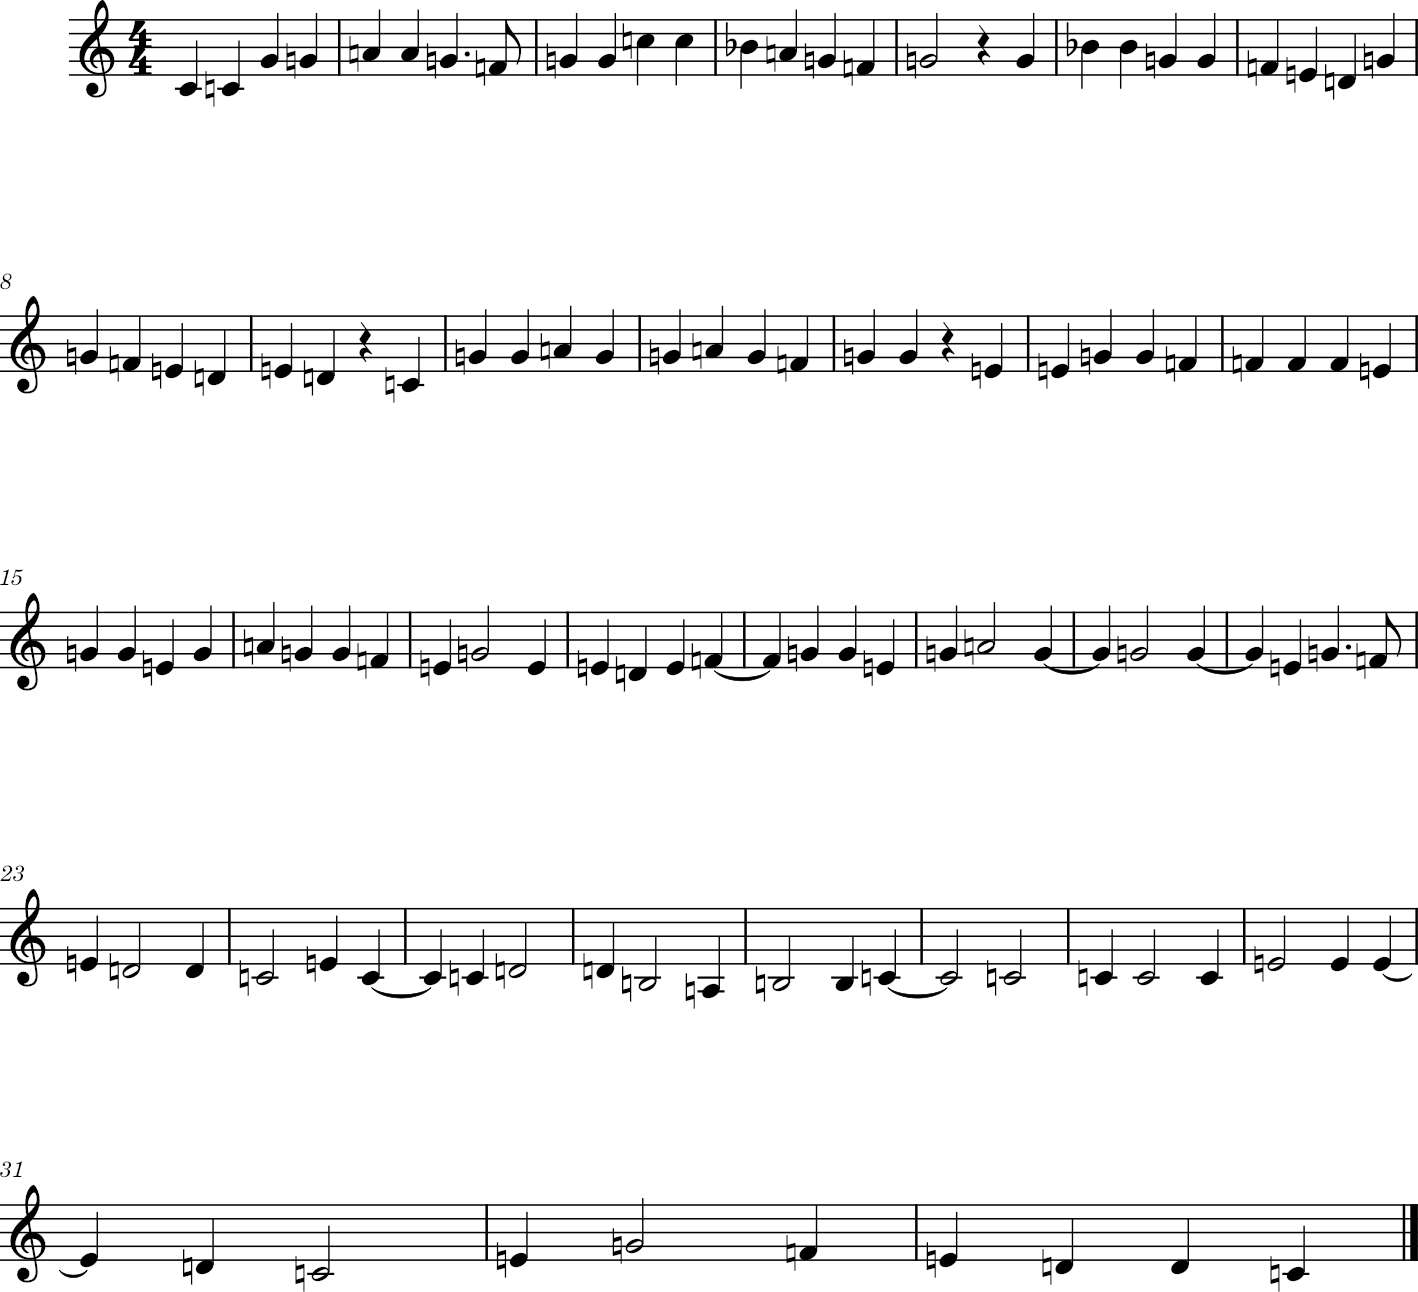

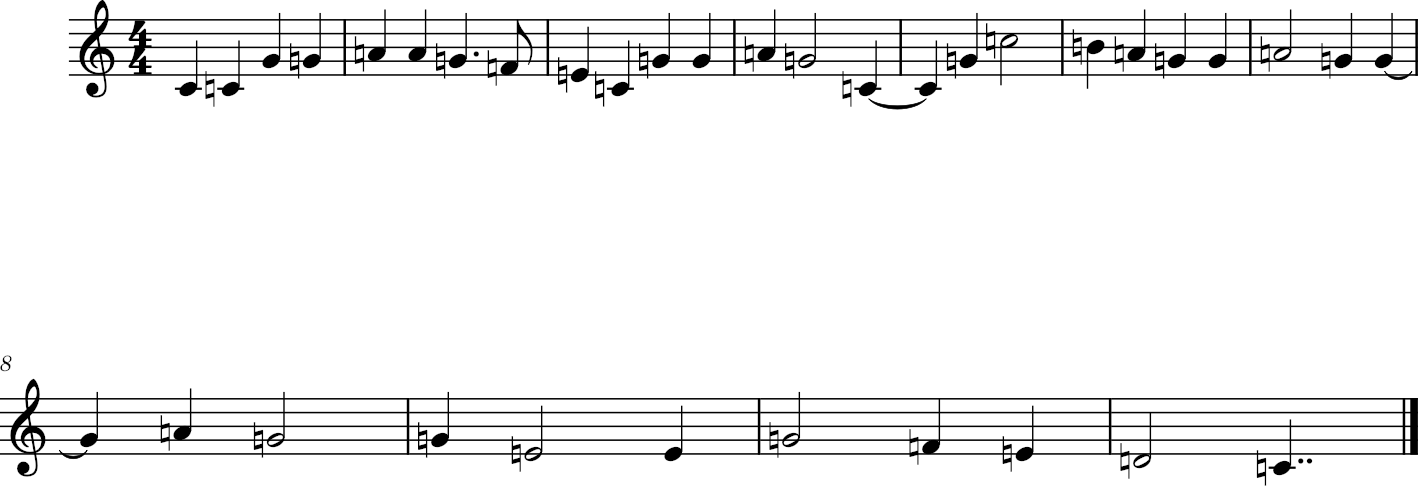

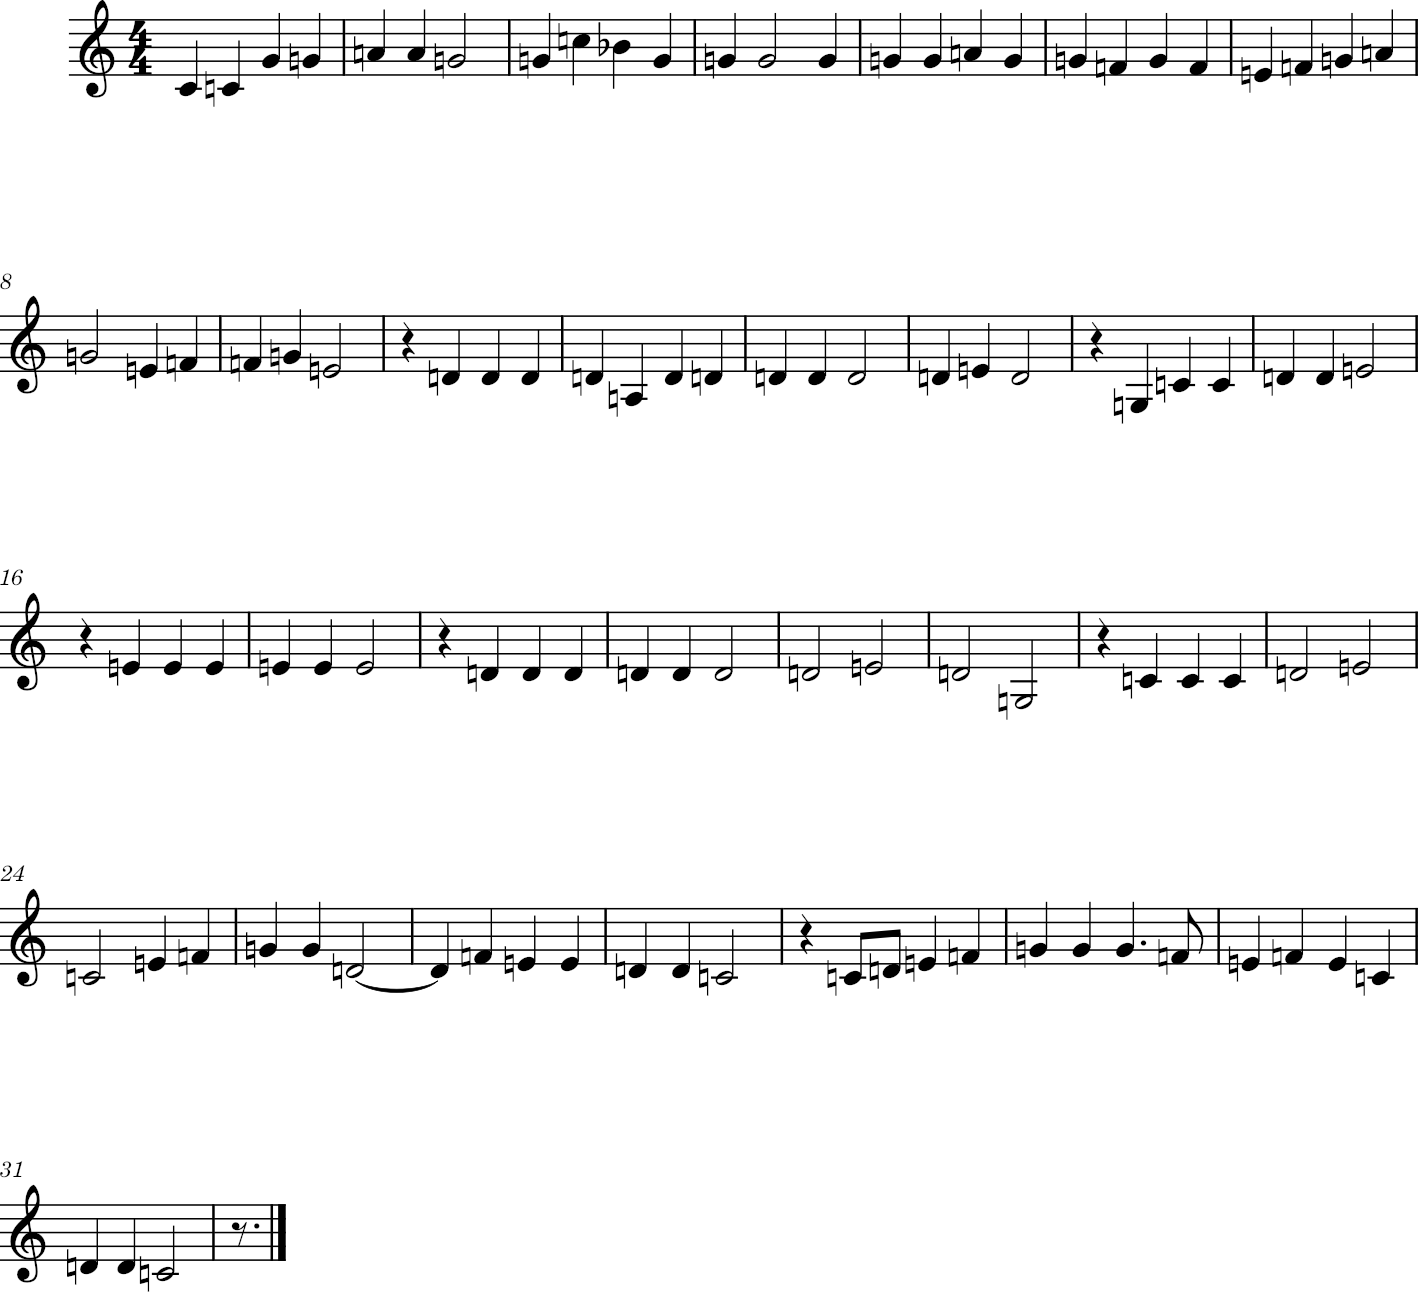

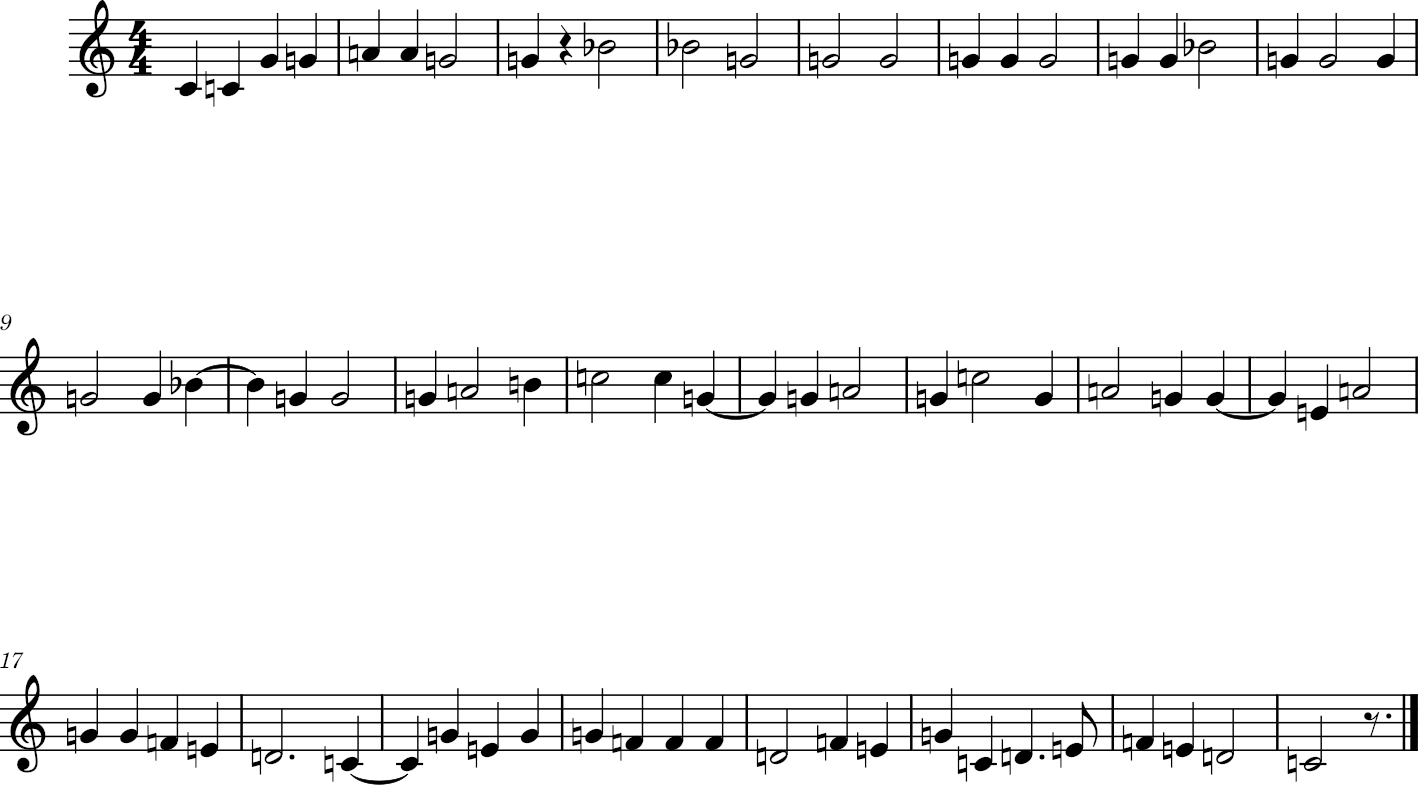

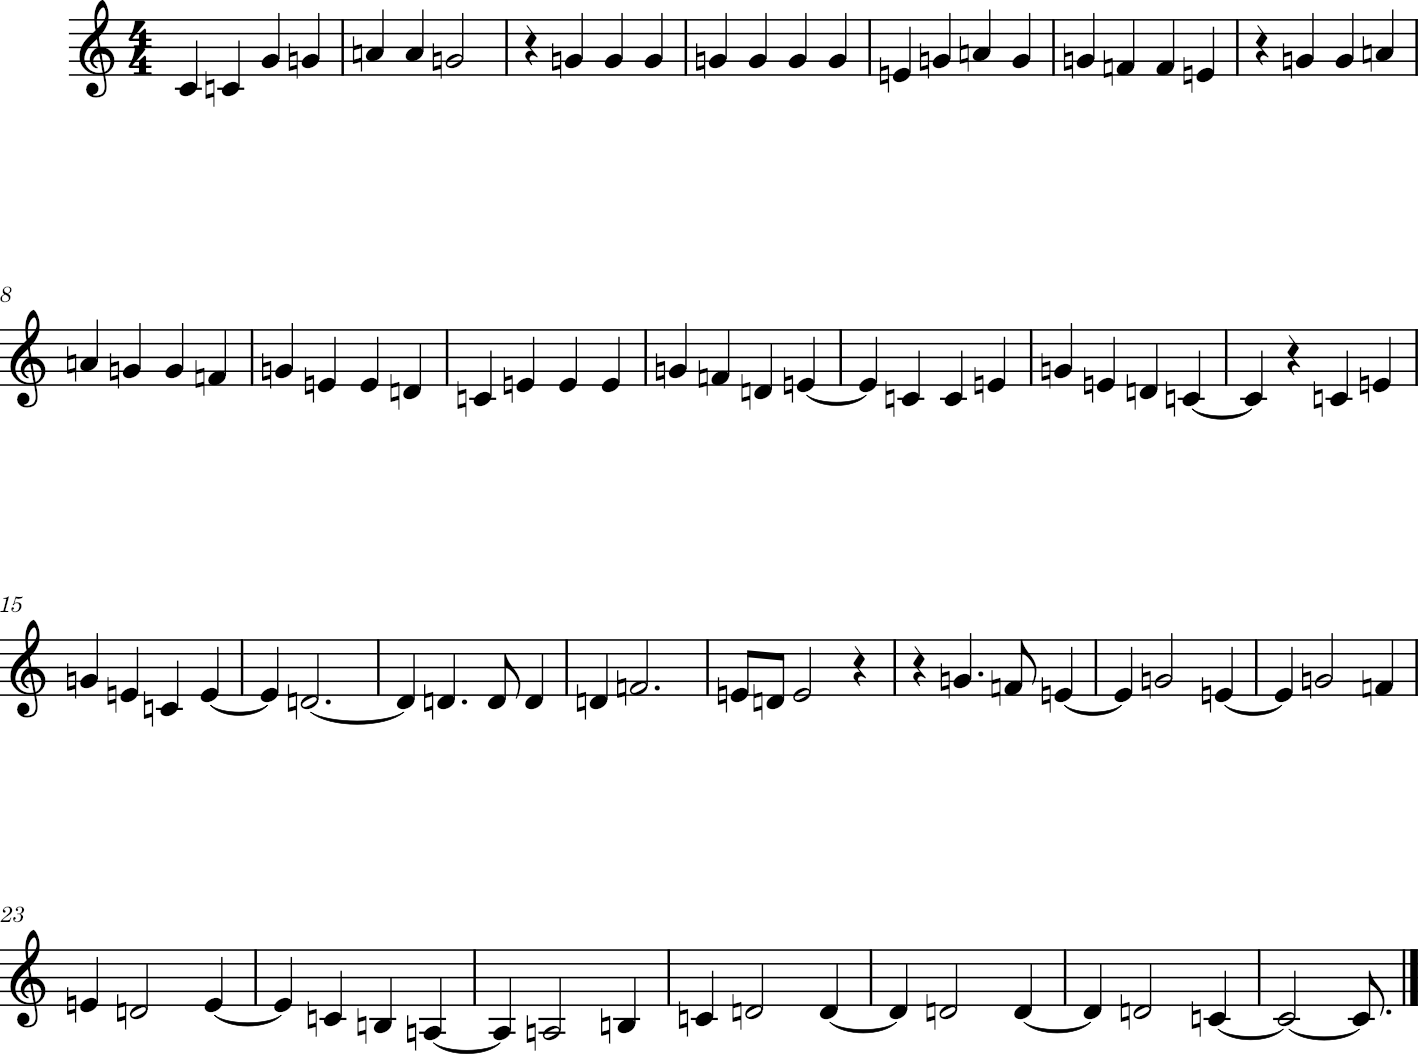

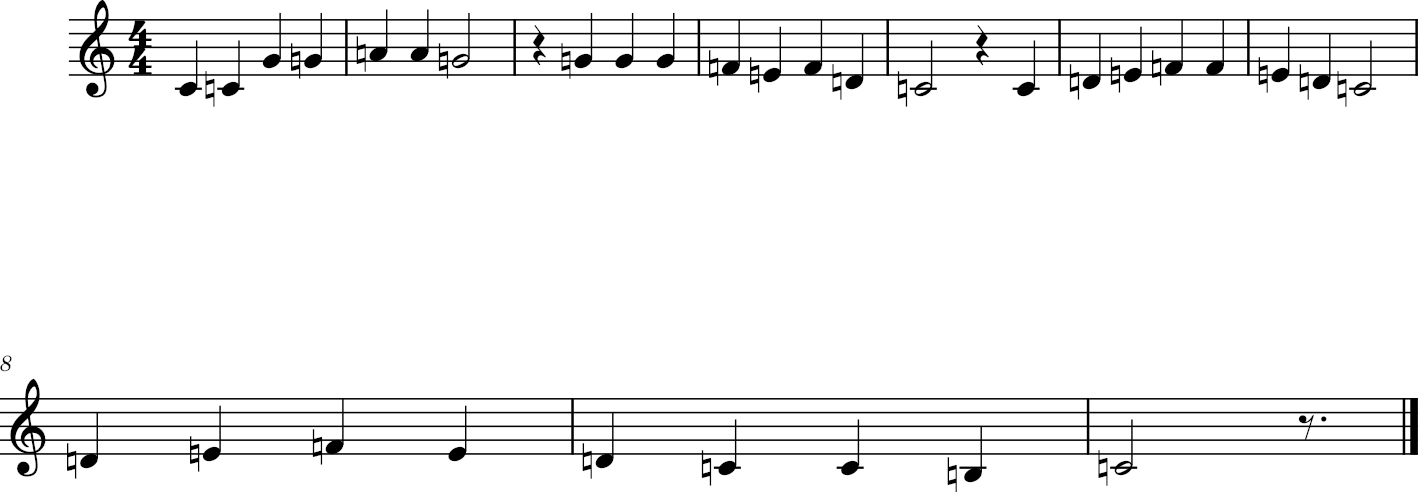

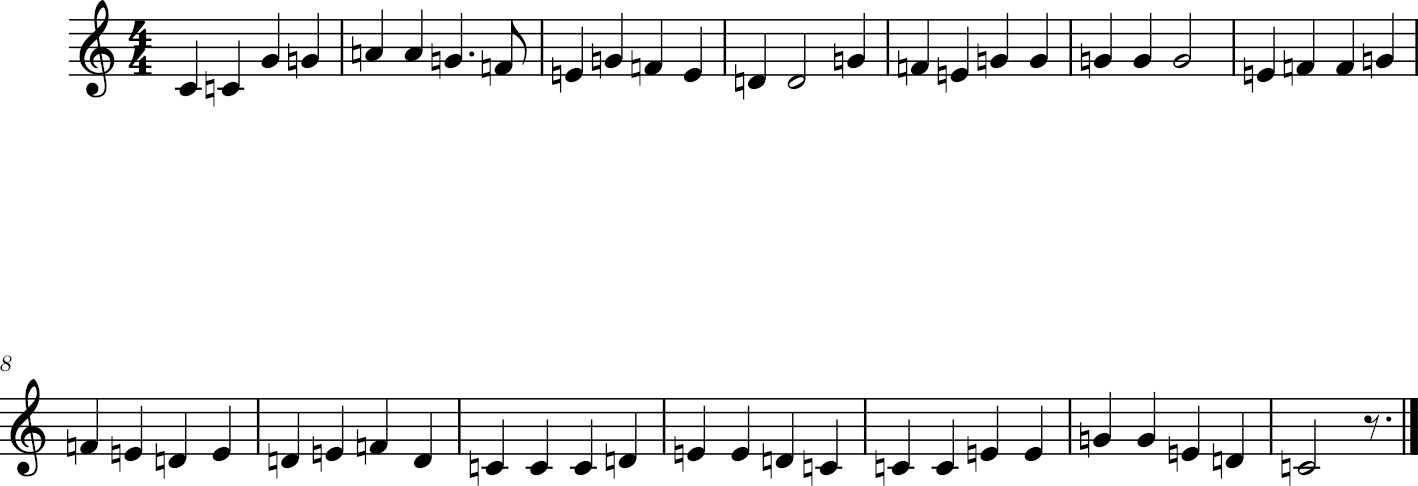

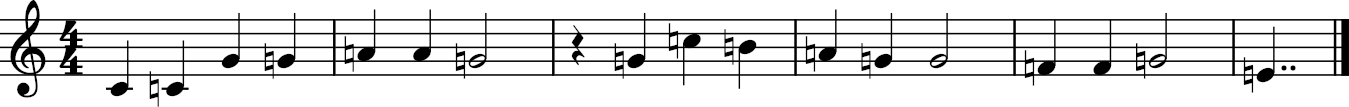

In [10]:
# Les mettre en format midi
songs_d = []
for i in range(10):
    songs_d.append(convert_to_midi(melodies_deutsch[i]))

for song in songs_d:
    song.show("midi")
    song.show()

#songs_d[1].write("midi", "../generated_melodies/goodexamples/ahvousidraisjemaman_deutsch.midi")